In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import *
plt.clf()
CSV_FILE_PATH_1 = os.path.join('new-untouched.csv')

In [2]:
HEADER = ["ID","calldate","callend","duration","connect_duration","progress_time","first_rtp_time","caller",
          "caller_domain","caller_reverse","callername","callername_reverse","called","called_domain","called_reverse",
          "sipcallerip","sipcallerport","sipcalledip","sipcalledport","whohanged","bye","lastSIPresponse_id",
          "lastSIPresponseNum","sighup","dscp","a_index","b_index","a_payload","b_payload","a_saddr","b_saddr",
          "a_received","b_received","a_lost","b_lost","a_ua_id","b_ua_id","a_avgjitter_mult10","b_avgjitter_mult10",
          "a_maxjitter","b_maxjitter","a_sl1","a_sl2","a_sl3","a_sl4","a_sl5","a_sl6","a_sl7","a_sl8","a_sl9","a_sl10",
          "a_d50","a_d70","a_d90","a_d120","a_d150","a_d200","a_d300","b_sl1","b_sl2","b_sl3","b_sl4","b_sl5","b_sl6","b_sl7",
          "b_sl8","b_sl9","b_sl10","b_d50","b_d70","b_d90","b_d120","b_d150","b_d200","b_d300","a_mos_lqo_mult10",
          "b_mos_lqo_mult10","a_mos_f1_mult10","a_mos_f2_mult10","a_mos_adapt_mult10","b_mos_f1_mult10","b_mos_f2_mult10",
          "b_mos_adapt_mult10","a_rtcp_loss","a_rtcp_maxfr","a_rtcp_avgfr_mult10","a_rtcp_maxjitter","a_rtcp_avgjitter_mult10",
          "b_rtcp_loss","b_rtcp_maxfr","b_rtcp_avgfr_mult10","b_rtcp_maxjitter","b_rtcp_avgjitter_mult10","a_last_rtp_from_end",
          "b_last_rtp_from_end","payload","jitter_mult10","mos_min_mult10","a_mos_min_mult10","b_mos_min_mult10",
          "packet_loss_perc_mult1000","a_packet_loss_perc_mult1000","b_packet_loss_perc_mult1000","delay_sum","a_delay_sum",
          "b_delay_sum","delay_avg_mult100","a_delay_avg_mult100","b_delay_avg_mult100","delay_cnt","a_delay_cnt",
          "b_delay_cnt","rtcp_avgfr_mult10","rtcp_avgjitter_mult10","lost","id_sensor","price_operator_mult100",
          "price_operator_currency_id","price_customer_mult100","price_customer_currency_id","reason_sip_cause",
          "reason_sip_text_id","reason_q850_cause","reason_q850_text_id","caller_silence","called_silence",
          "caller_silence_end","called_silence_end","a_mos_xr_min_mult10","b_mos_xr_min_mult10","a_mos_xr_mult10",
          "b_mos_xr_mult10","response_time_100","response_time_xxx","a_mos_f1_min_mult10","a_mos_f2_min_mult10",
          "a_mos_adapt_min_mult10","b_mos_f1_min_mult10","b_mos_f2_min_mult10","b_mos_adapt_min_mult10","a_rtp_ptime",
          "b_rtp_ptime","flags"]

In [3]:
df = pd.read_csv(CSV_FILE_PATH_1, names=HEADER)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (95,97,98,99,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
filter1 = ((df['b_mos_f1_mult10'] < 40) | (df['b_mos_f2_mult10'] < 40) | (df['b_mos_adapt_mult10'] < 40))

In [16]:
df[filter1].shape

(12035, 145)

In [11]:
df.shape

(1374842, 145)

In [14]:
filter2 = ((df['b_mos_adapt_mult10'] < 4))
df[filter2].shape

(268, 145)

In [8]:
#### procure data -> Delay_Sum, Jitter, MOS
sum_pkt_loss_a =  df['a_sl1'] + df['a_sl2'] + df['a_sl3'] +\
      df['a_sl4'] + df['a_sl5'] + df['a_sl6'] + df['a_sl7'] + \
      df['a_sl8'] + df['a_sl9'] + df['a_sl10'] 

sum_pkt_loss_b =  df['b_sl1'] + df['b_sl2'] + df['b_sl3'] +\
      df['b_sl4'] + df['b_sl5'] + df['b_sl6'] + df['b_sl7'] + \
      df['b_sl8'] + df['b_sl9'] + df['b_sl10'] 
# avg_pkt_loss = optional b/c 0's can be in either row for the same thing

In [11]:

xi_a = df[['delay_sum','a_maxjitter','a_mos_adapt_mult10','a_mos_f1_mult10', 'a_mos_f2_mult10']].values
x_a = np.zeros((xi_a.shape[0], xi_a.shape[1]+1))
x_a[:,:-1] = xi_a
x_a[:,-1] = np.ones(xi_a.shape[0])

xi_b = df[['delay_sum','b_maxjitter','b_mos_adapt_mult10','b_mos_f1_mult10', 'b_mos_f2_mult10']].values
x_b = np.zeros((xi_b.shape[0], xi_b.shape[1]+1))
x_b[:,:-1] = xi_b
x_b[:,-1] = np.ones(xi_b.shape[0])

[  4.29045772e-04   1.82961959e-02   7.18087065e-01  -5.94220425e+00
   6.55052198e-01   2.06745352e+02]


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Regression Score of Packet Loss & Mos Version A 0.0237224153003


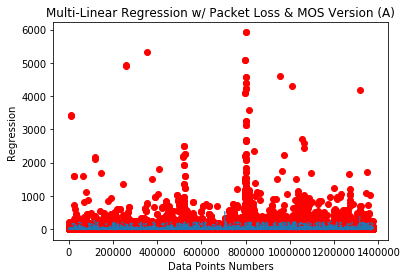

In [14]:
####### Multi-Linear Regression W/ Packet Loss (A) & MOS

fig1 = plt.figure(1)
y = sum_pkt_loss_a.values
m = np.linalg.lstsq(x_a,y)
yfit = x_a.dot(m[0])
# print (yfit.shape, y.shape, m[0].shape, x_a.shape)
i = range(len(y))
print(m[0])
plt.plot(i,y,'ro')
plt.plot(i,yfit,':')
plt.title('Multi-Linear Regression w/ Packet Loss & MOS Version (A)')
plt.xlabel('Data Points Numbers')
plt.ylabel('Regression')
fig1.show()
# print('x_a ',x_a,'\n y \n', y)
reg_score = np.corrcoef(y, yfit)[0, 1]**2
print('Regression Score of Packet Loss & Mos Version A', reg_score)

# plt.show()


[  3.72163636e-04  -2.50580392e-03   7.72816228e-01  -5.88657051e+00
   1.33141891e+00   1.71437207e+02]


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Regression Score of Packet Loss & Mos Version B 0.011227069683


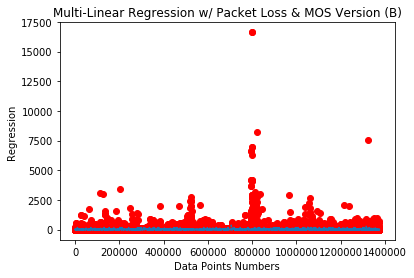

In [15]:
####### Multi-Linear Regression W/ Packet Loss (B) & MOS
fig2 = plt.figure(2)
y0 = sum_pkt_loss_b.values
m0 = np.linalg.lstsq(x_b,y0)
yfit0 = x_b.dot(m0[0])
# print (yfit0.shape, y0.shape, m0[0].shape, x_b.shape)
i0 = range(len(y0))
print(m0[0])
plt.plot(i, y0, 'ro')
plt.plot(i,yfit0,':')
plt.title('Multi-Linear Regression w/ Packet Loss & MOS Version (B)')
plt.xlabel('Data Points Numbers')
plt.ylabel('Regression')
fig2.show()
reg_score0 = np.corrcoef(y0, yfit0)[0, 1]**2
print('Regression Score of Packet Loss & Mos Version B', reg_score0)
# plt.show()

#######################################################################


In [16]:
'''
Multi-Linear regression: data is extremely noisy and messy
- no relationship between the variables 
- correlation score is extremely poor -> reject correlation between the variables 
- indication poor 

'''

'\nMulti-Linear regression: data is extremely noisy and messy\n- no relationship between the variables \n- correlation score is extremely poor -> reject correlation between the variables \n- indication poor \n\n'

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


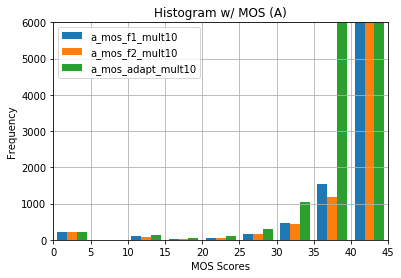

In [17]:
mindurcalls=df
mindurcalls['connect_duration'].fillna(value=0, inplace=True)
mindurcalls = mindurcalls[~pd.isnull(mindurcalls['connect_duration'])]
binwidth = 5
bins_hist = range(0, 45 + binwidth, binwidth)

###### Histogram part A
fig3 = plt.figure(3)

mos_a1 = mindurcalls['a_mos_f1_mult10'].fillna(0)
mos_a2 = mindurcalls['a_mos_f2_mult10'].fillna(0)
mos_adapt_a = mindurcalls['a_mos_adapt_mult10'].fillna(0)

hist_dataA = [mos_a1, mos_a2, mos_adapt_a]
hist_labels = ['a_mos_f1_mult10','a_mos_f2_mult10','a_mos_adapt_mult10']
plt.hist(hist_dataA, bins = bins_hist , alpha=1, label= hist_labels)
plt.legend(loc='upper left')
plt.grid(True)
plt.axis([0, 45, 0, 6000],'scaled')
plt.xlabel('MOS Scores')
plt.ylabel('Frequency')
plt.title('Histogram w/ MOS (A)')
fig3.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


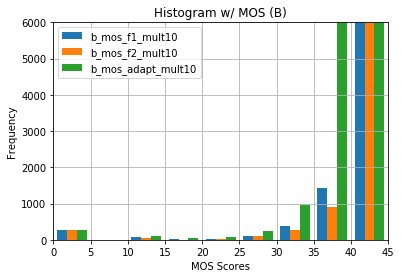

In [18]:
###### Histogram part B
fig4 = plt.figure(4)

mos_b1 = mindurcalls['b_mos_f1_mult10'].fillna(0)
mos_b2 = mindurcalls['b_mos_f2_mult10'].fillna(0)
mos_adapt_b = mindurcalls['b_mos_adapt_mult10'].fillna(0)

hist_dataB = [mos_b1, mos_b2, mos_adapt_b]
hist_labels = ['b_mos_f1_mult10','b_mos_f2_mult10','b_mos_adapt_mult10']
plt.hist(hist_dataB, bins_hist, alpha=1, label= hist_labels)
plt.legend(loc='upper left')
plt.grid(True)
plt.axis([0, 45, 0, 6000],'scaled')
plt.xlabel('MOS Scores')
plt.ylabel('Frequency')
plt.title('Histogram w/ MOS (B)')
fig4.show()

plt.show()

In [4]:
def evaluaterow(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, delay_sum, connect_duration):

    calc_sum = get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10)

    final_sum = (delay_sum + calc_sum)/(connect_duration*1000)

    return final_sum


def get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    top_sum = 0
    n = 1
    w1 = 1
    w2 = 2
    w3 = 3
    w4 = 4
    w5 = 5
    w6 = 6
    w7 = 7
    w8 = 8
    w9 = 9
    w10 = 10

    top_sum += 20 * n * (a1) * (w1 - 1)
    n += 1
    top_sum += 20 * n * (a2) * (w2 - 1)
    n += 1
    top_sum += 20 * n * (a3) * (w3 - 1)
    n += 1
    top_sum += 20 * n * (a4) * (w4 - 1)
    n += 1
    top_sum += 20 * n * (a5) * (w5 - 1)
    n += 1
    top_sum += 20 * n * (a6) * (w6 - 1)
    n += 1
    top_sum += 20 * n * (a7) * (w7 - 1)
    n += 1
    top_sum += 20 * n * (a8) * (w8 - 1)
    n += 1
    top_sum += 20 * n * (a9) * (w9 - 1)
    n += 1
    top_sum += 20 * n * (a10) * (w10 - 1)

    return (top_sum)


#df = df.assign(qualfun=df_qualfun)
#df.compute()
#dfqf = df_qualfun.compute()


In [5]:
#qualfun for a
df['a_qualfun'] = df.apply(lambda df2: pd.Series(evaluaterow(df2['a_sl1'],df2['a_sl2'],df2['a_sl3'],df2['a_sl4'],df2['a_sl5'],df2['a_sl6'],df2['a_sl7'],df2['a_sl8'],df2['a_sl9'],df2['a_sl10'],df2['a_delay_sum'],df2['connect_duration'])),axis=1)


In [6]:
#qualfun for a
df['b_qualfun'] = df.apply(lambda df2: pd.Series(evaluaterow(df2['b_sl1'],df2['b_sl2'],df2['b_sl3'],df2['b_sl4'],df2['b_sl5'],df2['b_sl6'],df2['b_sl7'],df2['b_sl8'],df2['b_sl9'],df2['b_sl10'],df2['b_delay_sum'],df2['connect_duration'])),axis=1)


In [7]:
df.shape

(1374842, 145)

In [11]:
df['a_qualfun'].max()

5.75

In [12]:
df['b_qualfun'].max()

4.7539999999999996

In [18]:
df['a_qualfun']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14         0.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25         0.000000
26         0.000000
27         0.000000
28         0.000000
29         0.000000
             ...   
1374812    0.000000
1374813    0.000000
1374814    0.000000
1374815    0.000000
1374816    0.000000
1374817    0.000000
1374818    0.000000
1374819    0.000000
1374820    0.000000
1374821    0.000000
1374822    0.000000
1374823    0.000000
1374824    0.000000
1374825    0.000000
1374826    0.000000
1374827    0.026375
1374828    0.000000
1374829    0.000000
1374830    0.000000


In [7]:
filter_a = df['a_qualfun'] > 0.8
df[filter_a].shape

(154, 145)

In [8]:
filter_b = df['b_qualfun'] > 0.8
df[filter_b].shape

(32, 145)

In [7]:
filter_1 = df['a_qualfun'] > 0

In [8]:
d_a_qualfun = df[filter_1]
d_a_qualfun.shape

(193960, 145)

In [9]:
filter_2 = df['b_qualfun'] > 0
d_b_qualfun = df[filter_2]
d_b_qualfun.shape

(240107, 145)

In [10]:
total_qual = 193960 + 240107
total_overall = 1374842

percent = total_qual/total_overall

In [34]:
print(percent)

0.31572137016471713


In [35]:
print(total_qual)

434067


In [ ]:
plt.scatter(d_a_qualfun.head(100), d_b_qualfun.)
plt.show()

In [22]:
sum_pkt_loss_a =  df['a_sl1'] + df['a_sl2'] + df['a_sl3'] +\
      df['a_sl4'] + df['a_sl5'] + df['a_sl6'] + df['a_sl7'] + \
      df['a_sl8'] + df['a_sl9'] + df['a_sl10'] 

sum_pkt_loss_b =  df['b_sl1'] + df['b_sl2'] + df['b_sl3'] +\
      df['b_sl4'] + df['b_sl5'] + df['b_sl6'] + df['b_sl7'] + \
      df['b_sl8'] + df['b_sl9'] + df['b_sl10'] 

In [20]:
####### Multi-Linear Regression W/ Packet Loss & Qualfun Version (A)

xi2_a = df[['delay_sum','a_maxjitter', 'a_qualfun']].values
x2_a = np.zeros((xi2_a.shape[0], xi2_a.shape[1]+1))
x2_a[:,:-1] = xi2_a
x2_a[:,-1] = np.ones(xi2_a.shape[0])

(1374842,) (1374842,) (4,) (1374842, 4)
[  4.27394252e-04   1.53093585e-02   1.03298671e+02   1.35192978e+00]
Regression Score for MaxJitter A, Packet Loss & Qualfun Version A 0.00940912296338


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


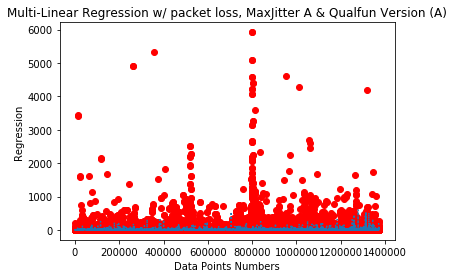

In [23]:

fig4 = plt.figure(4)
y2 = sum_pkt_loss_a.values
m2 = np.linalg.lstsq(x2_a,y2)
yfit2 = x2_a.dot(m2[0])
print (yfit2.shape, y2.shape, m2[0].shape, x2_a.shape)
i = range(len(y2))
print(m2[0])
plt.plot(i,y2,'ro')
plt.plot(i,yfit2,':')
plt.xlabel('Data Points Numbers')
plt.ylabel('Regression')
plt.title('Multi-Linear Regression w/ packet loss, MaxJitter A & Qualfun Version (A)')
reg_score = np.corrcoef(y2, yfit2)[0, 1]**2
print('Regression Score for MaxJitter A, Packet Loss & Qualfun Version A',reg_score)
fig4.show()

(1374842,) (1374842,) (4,) (1374842, 4)
[  2.18888865e-04  -1.47875981e-02   2.66996249e+02   1.45867544e+00]
Regression Score for MaxJitter A, Packet Loss & Qualfun Version A 0.00825308105551


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


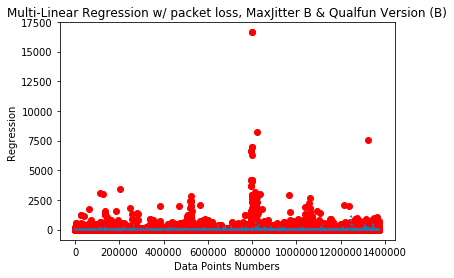

In [25]:

####### Multi-Linear Regression W/ Packet Loss & Qualfun Version (B)

xi2_b = df[['delay_sum','b_maxjitter', 'b_qualfun']].values
x2_b = np.zeros((xi2_b.shape[0], xi2_b.shape[1]+1))
x2_b[:,:-1] = xi2_b
x2_b[:,-1] = np.ones(xi2_b.shape[0])


fig5 = plt.figure(5)
y3 = sum_pkt_loss_b.values
m3 = np.linalg.lstsq(x2_b,y3)
yfit3 = x2_b.dot(m3[0])
print (yfit3.shape, y3.shape, m3[0].shape, x2_b.shape)
i0 = range(len(y3))
print(m3[0])
plt.plot(i, y3, 'ro')
plt.plot(i,yfit3,':')
plt.title('Multi-Linear Regression w/ packet loss, MaxJitter B & Qualfun Version (B)')
plt.xlabel('Data Points Numbers')
plt.ylabel('Regression')
reg_score = np.corrcoef(y3, yfit3)[0, 1]**2
print('Regression Score for MaxJitter A, Packet Loss & Qualfun Version A',reg_score)
fig5.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


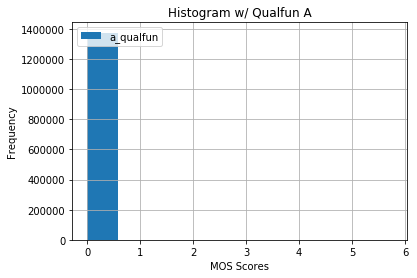

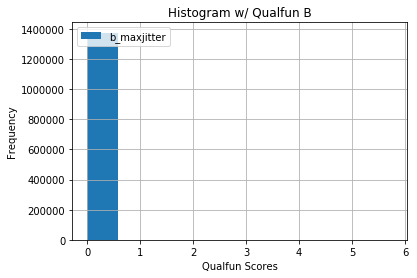

In [27]:

###### Histogram part A
fig6 = plt.figure(6)

qual_a = [ df['a_qualfun'] ]
# qualbins_hist_a = np.arange(df['b_maxjitter'].min(),df['b_maxjitter'].idxmax())

hist_labels = ['a_qualfun']
plt.hist(qual_a, alpha=1, label= hist_labels)
plt.legend(loc='upper left')
plt.grid(True)


plt.xlabel('MOS Scores')
plt.ylabel('Frequency')
plt.title('Histogram w/ Qualfun A')
fig6.show()
 

fig7 = plt.figure(7)
qual_b = [ df['b_qualfun'] ]
# qualbins_hist_b = np.arange(df['b_maxjitter'].min(),df['delay_sum'].idxmax())

hist_labels = ['b_maxjitter']
plt.hist(qual_a, alpha=1, label= hist_labels)
plt.legend(loc='upper left')
plt.grid(True)

plt.xlabel('Qualfun Scores')
plt.ylabel('Frequency')
plt.title('Histogram w/ Qualfun B')
fig7.show()

plt.show()
